In [58]:
import cv2
import imutils
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'


%matplotlib inline

In [62]:
plate_cascade = cv2.CascadeClassifier('cascade.xml')

img = cv2.imread('car.jpg')
grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plates = plate_cascade.detectMultiScale(grayed, scaleFactor=1.1, minNeighbors = 5)

In [71]:
def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

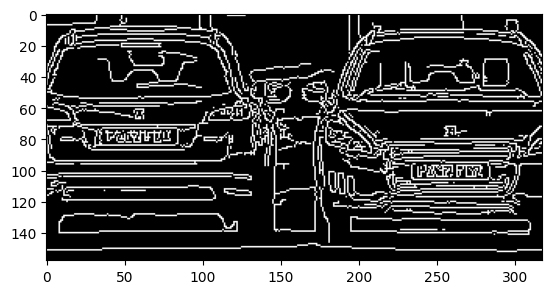

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [82]:


for (x,y,w,h) in plates:

    new_img = img[ y: y + h, x: x + w]

    new_img = cv2.imread('cars.jpg')

    # Convert to grayscale
    gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

   

    bfilter = cv2.bilateralFilter(gray, 11,17,17)
    edged = cv2.Canny(bfilter, 30,200)
    
    show_image(edged)
    
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    
    

location = None

for c in contours:
    # approximate the license plate contour
    approx = cv2.approxPolyDP(c, 10, True)

    # Look for contours with 4 corners
    if len(approx) == 4:
        location = approx
        break


location

# # Extract text
# plate = pytesseract.image_to_string(sharpened, lang='eng')
# print("Number plate is:", plate)
   
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location], 0,255,-1)
new_img = cv2.bitwise_and(img, img, mask=mask)
show_image(img)

show_image(new_img)